<a href="https://colab.research.google.com/github/phebetan/dsp-gamescribe/blob/main/game_scribe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving Updated_Cleaned_Games_Dataset.csv to Updated_Cleaned_Games_Dataset.csv


In [ ]:
# combine the two datasets.
import pandas as pd

# Load the datasets
gamescribe_dataset = pd.read_csv("Gamescribe_dataset (1) (1).csv")
cleaned_games_dataset = pd.read_csv( "Cleaned_Games_For_Model (2).csv")

# Print the first 10 entries of each dataset
print("First 10 entries of gamescribe_dataset:")
print(gamescribe_dataset.head(10))

print("\nFirst 10 entries of cleaned_games_dataset:")
print(cleaned_games_dataset.head(10))

FileNotFoundError: [Errno 2] No such file or directory: 'Gamescribe_dataset (1) (1).csv'

In [ ]:
# Create a dictionary mapping 'Name' to 'price' and 'genres'
name_to_price = gamescribe_dataset.set_index('Name')['Price'].to_dict()
name_to_genres = gamescribe_dataset.set_index('Name')['Genres'].to_dict()

# Add 'price' and 'genres' columns to 'cleaned_games_dataset'
cleaned_games_dataset['Price'] = cleaned_games_dataset['Name'].map(name_to_price)
cleaned_games_dataset['Genres'] = cleaned_games_dataset['Name'].map(name_to_genres)

# Check the updated dataset
print("\nUpdated Dataset:")
print(cleaned_games_dataset.head())

# Save the updated dataset to a new CSV file
cleaned_games_dataset.to_csv("Updated_Cleaned_Games_Dataset.csv", index=False)


Updated Dataset:
   Unnamed: 0                                     Name Platform  \
0         555                 LEGO Marvel Super Heroes      PS3   
1         556                   Fire Emblem: Awakening      3DS   
2         557            Mortal Kombat vs. DC Universe      PS3   
3         558                Tenchu: Stealth Assassins       PS   
4         559  Harry Potter and the Chamber of Secrets      GBA   

                                             Summary  Global_Sales  \
0  LEGO Marvel Super Heroes features an original ...          2.00   
1  Lead an army of soldiers in a series of scaled...          2.00   
2  For the first time ever Scorpion, Sub-Zero and...          2.00   
3  Prowl and strike with lethal precision as ninj...          1.99   
4  Be Harry Potter in a new adventure with more m...          1.99   

                                Preprocessed_Summary  \
0  lego marvel super hero feature original story ...   
1  lead army soldier series scaled turn-based 

In [ ]:
from google.colab import files

# Save the updated dataset to a new CSV file
cleaned_games_dataset.to_csv("Updated_Cleaned_Games_Dataset.csv", index=False)

# Download the CSV file
files.download("Updated_Cleaned_Games_Dataset.csv")


NameError: name 'cleaned_games_dataset' is not defined

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving Updated_Cleaned_Games_Dataset.csv to Updated_Cleaned_Games_Dataset (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')

#load the dataset

cleaned_games_dataset = pd.read_csv("Updated_Cleaned_Games_Dataset.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk import word_tokenize, pos_tag

# Define the preprocess_text function
def preprocess_text(text):
    # Check if the text is a string or bytes-like object
    if isinstance(text, str):
        # Remove single letters and digits
        text = re.sub(r'\b[a-zA-Z]\b|\b\d+\b', '', text)
        return text.strip()
    else:
        return ''

# Function to check if a word is a proper noun
def is_proper_noun(word):
    tagged_word = pos_tag([word])
    return tagged_word[0][1] == 'NNP'  # NNP denotes proper noun in Penn Treebank POS Tagset

# Function to check if a phrase contains repeat words or proper nouns
def is_valid_phrase(phrase):
    words = phrase.split()
    if len(words) != len(set(words)):  # Check for repeat words
        return False
    if any(is_proper_noun(word) for word in words):  # Check for proper nouns
        return False
    # Add additional checks for phrases that don't make sense
    # For example, you can check against a list of common nonsensical phrases
    return True

# Phrases to filter out
filtered_phrases = ['curious george', 'leper zombies', 'pikachu oshawott', 'square enix', 'harvest moon',
                    'donkey kong', 'mortal kombat', 'mlb mlb', 'tintin counterpart', 'retells trilogy',
                    'princess zelda', 'princess peach', 'diamond mlb', 'warner bros', 'silent hill',
                    'legion undead', 'fia formula']

# Load the dataset in chunks
chunk_size = 1000
top_ngrams = pd.DataFrame(dtype='float64')
vectorizer = TfidfVectorizer(ngram_range=(2, 3), max_features=10000)  # Limiting to 10,000 features
for chunk in pd.read_csv("Updated_Cleaned_Games_Dataset.csv", chunksize=chunk_size):
    # Replace missing values with empty strings
    chunk['Preprocessed_Summary_More'].fillna('', inplace=True)

    # Apply preprocessing to the 'Preprocessed_Summary_More' column
    chunk['Preprocessed_Summary_More'] = chunk['Preprocessed_Summary_More'].apply(preprocess_text)

    # Extract the text data
    text_data = chunk['Preprocessed_Summary_More'].tolist()

    # Vectorize the text data using TF-IDF with bigrams and trigrams
    tfidf_matrix = vectorizer.fit_transform(text_data)

    # Convert TF-IDF matrix to DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # Add global sales data to the TF-IDF DataFrame
    tfidf_df['Global_Sales'] = chunk['Global_Sales']

    # Calculate the mean TF-IDF score for each n-gram
    mean_tfidf_by_ngram = tfidf_df.drop(columns=['Global_Sales']).mean()

    # Calculate the frequency of each n-gram
    ngram_frequency = tfidf_df.drop(columns=['Global_Sales']).sum()

    # Combine TF-IDF and frequency into a DataFrame
    ngram_metrics = pd.DataFrame({'TF-IDF': mean_tfidf_by_ngram, 'Frequency': ngram_frequency})

    # Remove filtered phrases
    filtered_ngram_metrics = ngram_metrics.drop(index=filtered_phrases, errors='ignore')

    # Remove bigrams that are subsumed by trigrams
    bigrams = [col for col in filtered_ngram_metrics.index if ' ' in col]
    trigrams = [col for col in filtered_ngram_metrics.index if ' ' in col and col.count(' ') == 2]

    redundant_bigrams = set()
    for bigram in bigrams:
        if any(bigram in trigram for trigram in trigrams):
            redundant_bigrams.add(bigram)

    # Filter out redundant bigrams
    filtered_ngram_metrics = filtered_ngram_metrics.drop(labels=redundant_bigrams)

    # Filter out phrases that contain repeat words or proper nouns
    filtered_ngram_metrics = filtered_ngram_metrics[filtered_ngram_metrics.index.map(is_valid_phrase)]

    # Combine the results from all chunks
    top_ngrams = pd.concat([top_ngrams, filtered_ngram_metrics])

# Sort n-grams by mean TF-IDF score and get the top 1000
top_ngrams = top_ngrams.groupby(level=0).mean().sort_values(by='TF-IDF', ascending=False).head(1000)

# Get unigrams not included in top ngrams
vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=10000, stop_words=['in', 'on', 'to', 'the'])  # Limiting to 10,000 features and removing specified words
tfidf_matrix = vectorizer.fit_transform(text_data)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate the mean TF-IDF score for each unigram
mean_tfidf_by_unigram = tfidf_df.mean()

# Calculate the frequency of each unigram
unigram_frequency = tfidf_df.sum()

# Combine TF-IDF and frequency into a DataFrame
unigram_metrics = pd.DataFrame({'TF-IDF': mean_tfidf_by_unigram, 'Frequency': unigram_frequency})

# Filter out unigrams that are part of top ngrams
significant_unigrams = unigram_metrics.drop(index=top_ngrams.index, errors='ignore')

# Sort unigrams by mean TF-IDF score
top_unigrams = significant_unigrams.sort_values(by='TF-IDF', ascending=False).head(1000)



In [ ]:
# Combine top n-grams and top unigrams into a single DataFrame
combined_df = pd.concat([top_ngrams, top_unigrams])

# Add a new column for the combined phrases
combined_df['Phrase'] = combined_df.index

# Rename the columns
combined_df = combined_df.rename(columns={'TF-IDF': 'TFIDF'})

# Reorder columns
combined_df = combined_df[['Phrase', 'Frequency', 'TFIDF']]

# Save the new dataset to a CSV file
combined_df.to_csv('combined_phrases.csv', index=False)
from google.colab import files

# Download the CSV file
files.download('combined_phrases.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Define the new success score combining TF-IDF and frequency
top_ngrams['Success_Score'] = top_ngrams['TF-IDF'] * top_ngrams['Frequency']
top_unigrams['Success_Score'] = top_unigrams['TF-IDF'] * top_unigrams['Frequency']

# Sort n-grams by the new success score and get the top 100
top_ngrams = top_ngrams.sort_values(by='Success_Score', ascending=False).head(100)

# Sort single words by the new success score and get the top 20
top_unigrams = top_unigrams.sort_values(by='Success_Score', ascending=False).head(20)

# Print the top 100 bigrams and trigrams based on the new success score
print("Top 100 bigrams and trigrams contributing to highest global sales (combining TF-IDF and frequency):")
print(top_ngrams)

# Print the top 20 single words based on the new success score
print("Top 20 single words contributing to highest global sales (combining TF-IDF and frequency):")
print(top_unigrams)


Top 100 bigrams and trigrams contributing to highest global sales (combining TF-IDF and frequency):
                           TF-IDF  Frequency  Success_Score
power ups                0.006105   6.105201       0.037273
multi player             0.005234   5.233979       0.027395
side scrolling           0.003622   3.621978       0.013119
mind bending             0.003139   3.138589       0.009851
off road                 0.002994   2.994082       0.008965
long awaited             0.002972   2.972261       0.008834
turn based               0.002837   2.837220       0.008050
wide open                0.002657   2.656751       0.007058
wifi compatible          0.002407   2.406986       0.005794
all american             0.002327   2.326934       0.005415
bone crushing            0.002261   2.260554       0.005110
in depth                 0.002222   2.221734       0.004936
long running             0.002139   2.138694       0.004574
shoot em                 0.002098   2.098124       0.004402


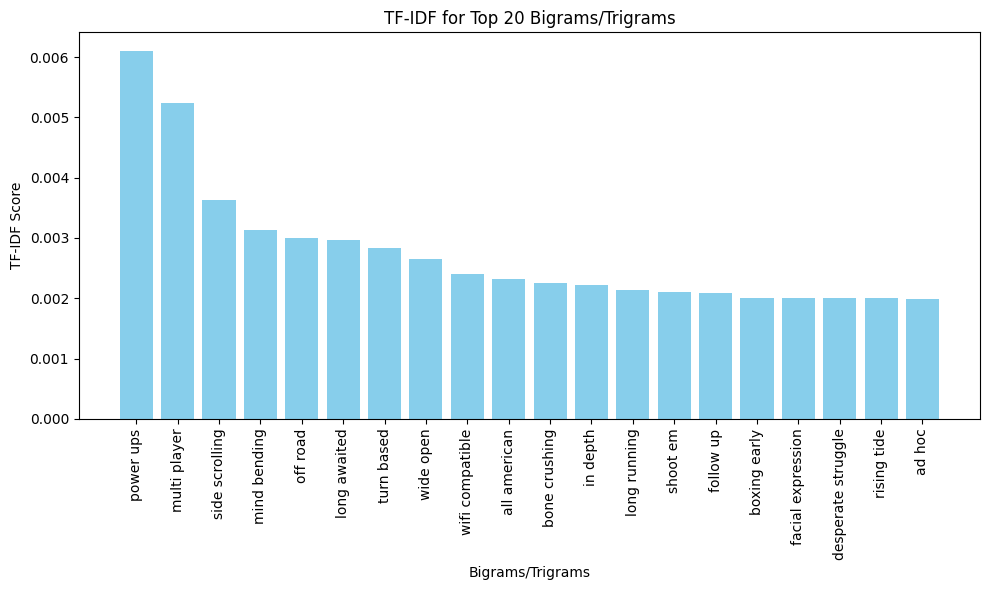

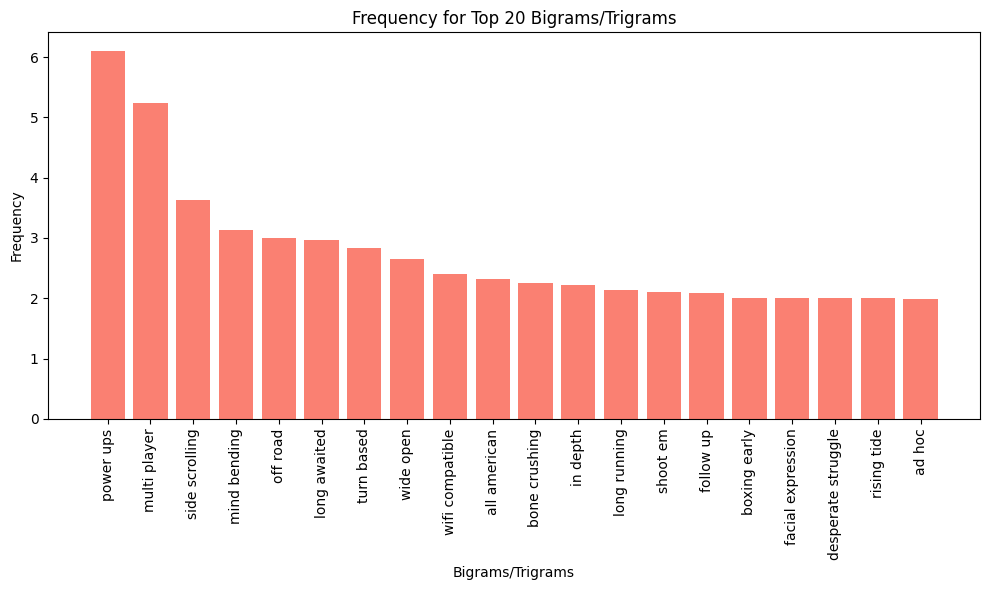

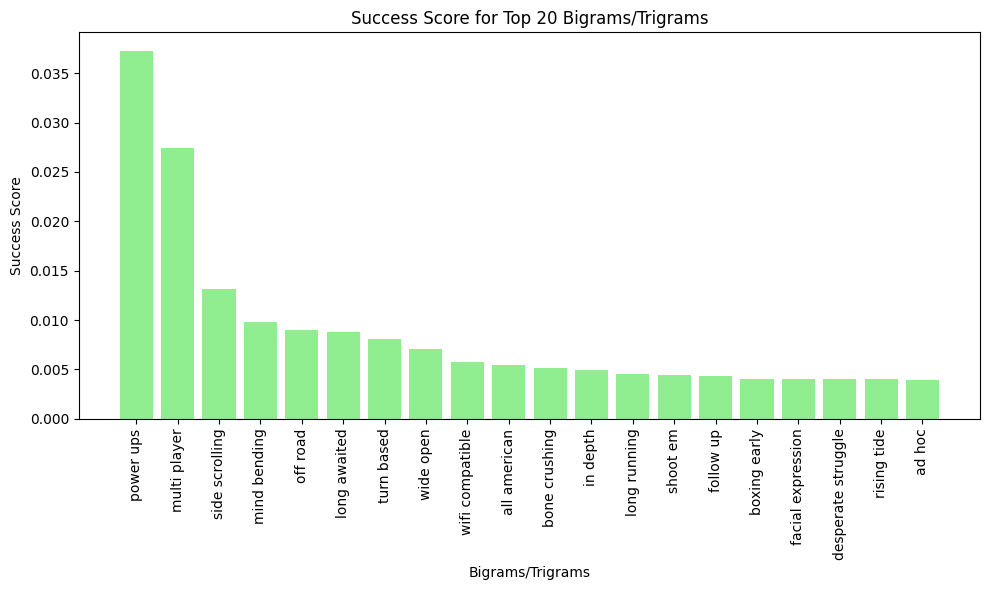

In [ ]:
import matplotlib.pyplot as plt

# Visualize TF-IDF for bigrams/trigrams
plt.figure(figsize=(10, 6))
plt.bar(top_ngrams.index[:20], top_ngrams['TF-IDF'][:20], color='skyblue')
plt.title('TF-IDF for Top 20 Bigrams/Trigrams')
plt.xlabel('Bigrams/Trigrams')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualize frequency for bigrams/trigrams
plt.figure(figsize=(10, 6))
plt.bar(top_ngrams.index[:20], top_ngrams['Frequency'][:20], color='salmon')
plt.title('Frequency for Top 20 Bigrams/Trigrams')
plt.xlabel('Bigrams/Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualize success score for bigrams/trigrams
plt.figure(figsize=(10, 6))
plt.bar(top_ngrams.index[:20], top_ngrams['Success_Score'][:20], color='lightgreen')
plt.title('Success Score for Top 20 Bigrams/Trigrams')
plt.xlabel('Bigrams/Trigrams')
plt.ylabel('Success Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


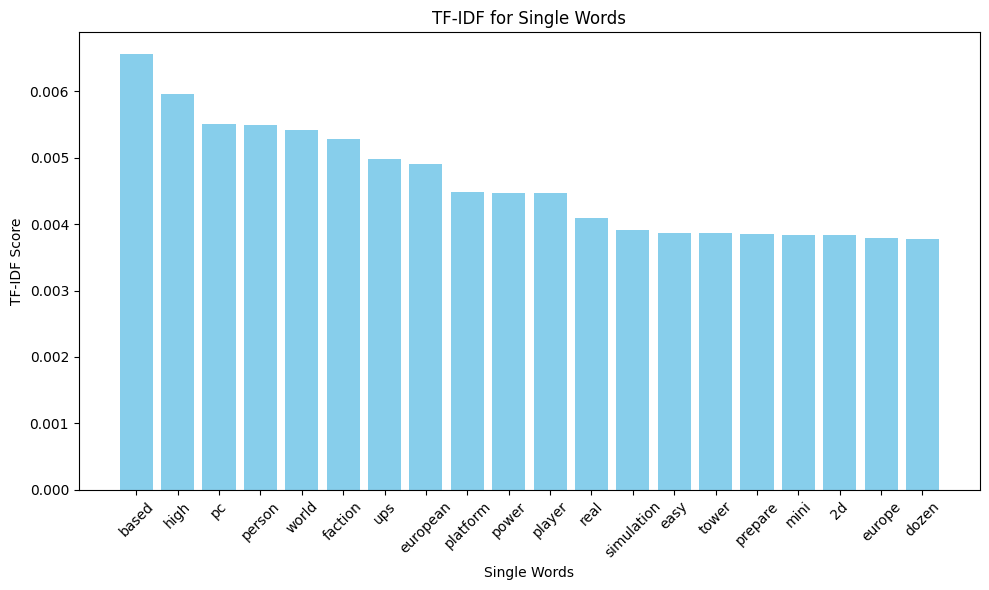

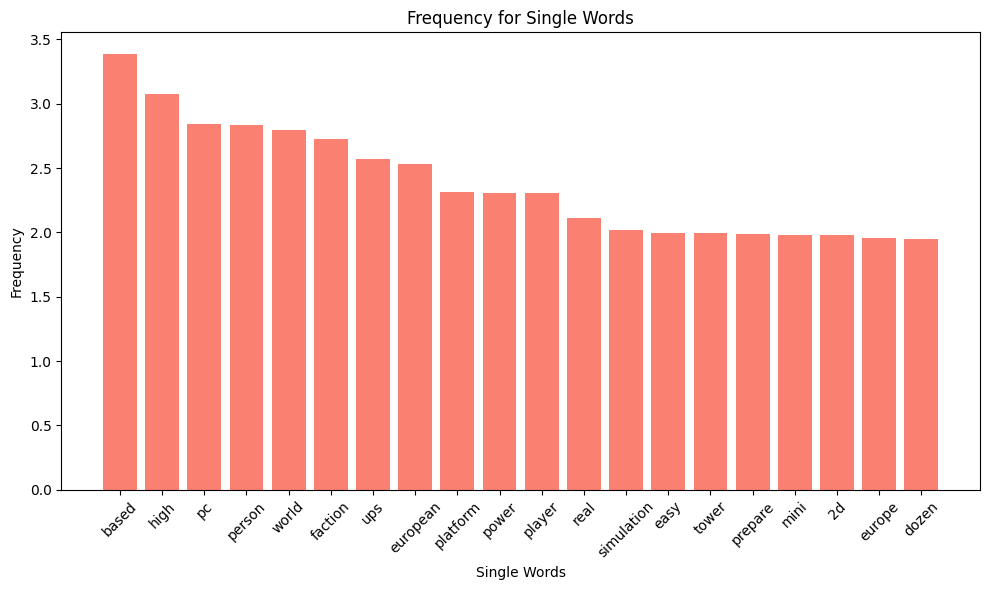

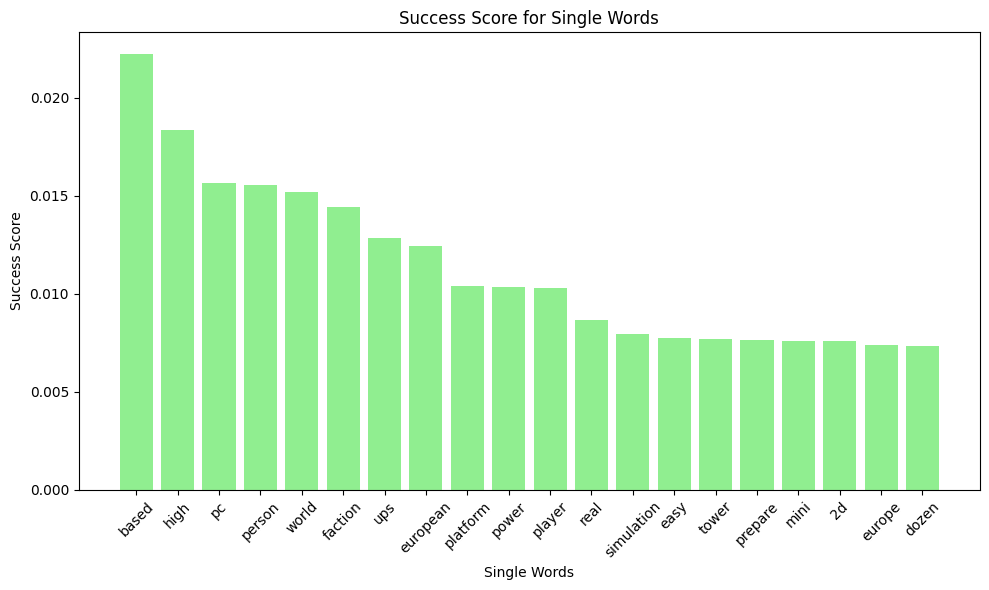

In [ ]:
# Visualize TF-IDF for single words
plt.figure(figsize=(10, 6))
plt.bar(top_unigrams.index, top_unigrams['TF-IDF'], color='skyblue')
plt.title('TF-IDF for Single Words')
plt.xlabel('Single Words')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize frequency for single words
plt.figure(figsize=(10, 6))
plt.bar(top_unigrams.index, top_unigrams['Frequency'], color='salmon')
plt.title('Frequency for Single Words')
plt.xlabel('Single Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize success score for single words
plt.figure(figsize=(10, 6))
plt.bar(top_unigrams.index, top_unigrams['Success_Score'], color='lightgreen')
plt.title('Success Score for Single Words')
plt.xlabel('Single Words')
plt.ylabel('Success Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk import word_tokenize, pos_tag

# Define the preprocess_text function
def preprocess_text(text):
    # Check if the text is a string or bytes-like object
    if isinstance(text, str):
        # Remove single letters and digits
        text = re.sub(r'\b[a-zA-Z]\b|\b\d+\b', '', text)
        return text.strip()
    else:
        return ''

# Function to check if a word is a proper noun
def is_proper_noun(word):
    tagged_word = pos_tag([word])
    return tagged_word[0][1] == 'NNP'  # NNP denotes proper noun in Penn Treebank POS Tagset

# Function to check if a phrase contains repeat words or proper nouns
def is_valid_phrase(phrase):
    words = phrase.split()
    if len(words) != len(set(words)):  # Check for repeat words
        return False
    if any(is_proper_noun(word) for word in words):  # Check for proper nouns
        return False
    # Add additional checks for phrases that don't make sense
    # For example, you can check against a list of common nonsensical phrases
    return True


# Define TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=10000)

# Tokenize and vectorize each Preprocessed_Summary_More
tfidf_matrix = vectorizer.fit_transform(cleaned_games_dataset['Preprocessed_Summary_More'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add TF-IDF scores for each word as new columns
cleaned_games_dataset = pd.concat([cleaned_games_dataset, tfidf_df], axis=1)


In [ ]:
from google.colab import files

# Download the updated dataset
files.download('updated_cleaned_games_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

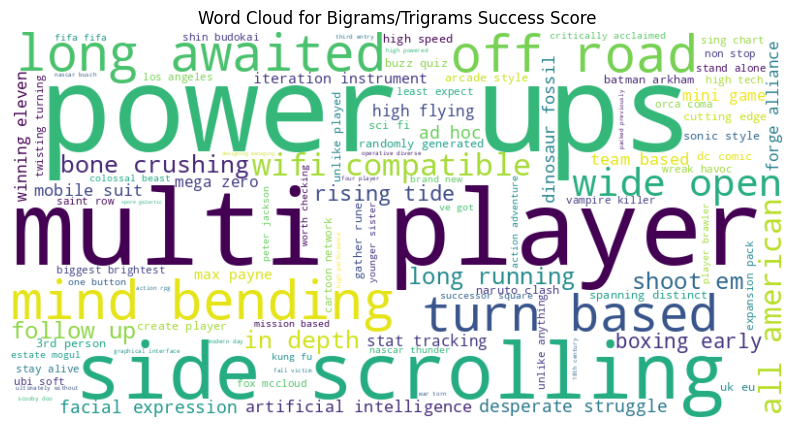

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for bigrams/trigrams success score
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_ngrams['Success_Score'])
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Bigrams/Trigrams Success Score')
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
import re
from nltk import pos_tag

# Function to check if a word is a proper noun
def is_proper_noun(word):
    tagged_word = pos_tag([word])
    return tagged_word[0][1] == 'NNP'  # NNP denotes proper noun in Penn Treebank POS Tagset

# Function to check if a phrase contains repeat words or proper nouns
def is_valid_phrase(phrase):
    words = phrase.split()
    if len(words) != len(set(words)):  # Check for repeat words
        return False
    if any(is_proper_noun(word) for word in words):  # Check for proper nouns
        return False
    # Check if the phrase contains filtered phrases
    if any(filtered_phrase in phrase for filtered_phrase in filtered_phrases):
        return False
    return True

# Phrases to filter out
filtered_phrases = ['curious george', 'leper zombies', 'pikachu oshawott', 'square enix', 'harvest moon',
                    'donkey kong', 'mortal kombat', 'mlb mlb', 'tintin counterpart', 'retells trilogy',
                    'princess zelda', 'princess peach', 'diamond mlb', 'warner bros', 'silent hill',
                    'legion undead', 'fia formula']

# Load the dataset
df = pd.read_csv("Updated_Cleaned_Games_Dataset.csv")

# Replace missing values with empty strings
df['Preprocessed_Summary_More'] = df['Preprocessed_Summary_More'].fillna('')

# Apply preprocessing to the 'Preprocessed_Summary_More' column
df['Preprocessed_Summary_More'] = df['Preprocessed_Summary_More'].apply(lambda text: ' '.join(word for word in text.split() if is_valid_phrase(word)))

# Save the modified DataFrame back to the CSV file
df.to_csv("Updated_Cleaned_Games_Dataset.csv", index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
import xgboost as xgb

# Read the dataset
df = pd.read_csv("Updated_Cleaned_Games_Dataset.csv")

# Drop rows with NaN values in the 'Preprocessed_Summary_More' column
df.dropna(subset=['Preprocessed_Summary_More'], inplace=True)

# Split the data into features (X) and target variable (y)
X = df['Preprocessed_Summary_More']
y = df['Global_Sales']

# Vectorize the preprocessed descriptions using TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=500)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Preprocess Genres
genres_onehot_encoder = OneHotEncoder(sparse_output=True)
genres_onehot = genres_onehot_encoder.fit_transform(df['Genres'].str.get_dummies(sep=','))

# Preprocess Price (assuming it's a numerical column)
price = df['Price'].fillna(0)  # Fill missing values with 0

# Preprocess Platform
platform_onehot_encoder = OneHotEncoder(sparse_output=True)
platform_onehot = platform_onehot_encoder.fit_transform(df['Platform'].astype(str).str.get_dummies())

# Concatenate features
X_features = hstack([X_tfidf, genres_onehot, price.values.reshape(-1, 1), platform_onehot])

# Split the data into training and testing sets
X_train_features, X_test_features, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train_features, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize XGBoost model with best parameters
best_xgb_model = xgb.XGBRegressor(**best_params)

# Train the model with the best parameters
best_xgb_model.fit(X_train_features, y_train)

# Predict on the testing set
y_pred = best_xgb_model.predict(X_test_features)


KeyboardInterrupt: 

In [ ]:
# Get the list of genre labels from the one-hot encoder
genre_labels = genres_onehot_encoder.get_feature_names_out()

# Iterate over the rows of the DataFrame and print the game name and its corresponding genres
for i, (game_name, row) in enumerate(zip(df.index, genres_onehot)):
    # Get the indices of nonzero elements (indicating the presence of a genre)
    nonzero_indices = row.nonzero()[1]

    # Get the genres for the current game
    game_genres = [genre_labels[index] for index in nonzero_indices]

    # Print the game name and its corresponding genres
    print(f"Game Name: {game_name}")
    print(f"Genres: {', '.join(game_genres)}")
    print()


In [ ]:
from tabulate import tabulate

# Create a list to hold the data for tabulation
table_data = []

# Iterate over the first 10 rows of the DataFrame and populate the table_data list
for i, (game_name, row) in enumerate(zip(df['Name'][:10], genres_onehot[:10])):
    # Get the indices of nonzero elements (indicating the presence of a genre)
    nonzero_indices = row.nonzero()[1]

    # Get the genres for the current game
    game_genres = [genre_labels[index] for index in nonzero_indices]

    # Append the game name and its corresponding genres to the table_data list
    table_data.append([game_name, ', '.join(game_genres)])

# Print the tabulated data
print(tabulate(table_data, headers=['Game Name', 'Genres'], tablefmt='grid'))


+-----------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Game Name                               | Genres                                                                                                                                                                                                                                                                                                                                                                                               |
+=========================================+=======================================================================================

In [ ]:
#Initialize XGBoost model with best parameters
best_xgb_model = xgb.XGBRegressor(**best_params)

#Train the model with the best parameters
best_xgb_model.fit(X_train, y_train)

#Predict on the testing set
y_pred = best_xgb_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.20486729108300897


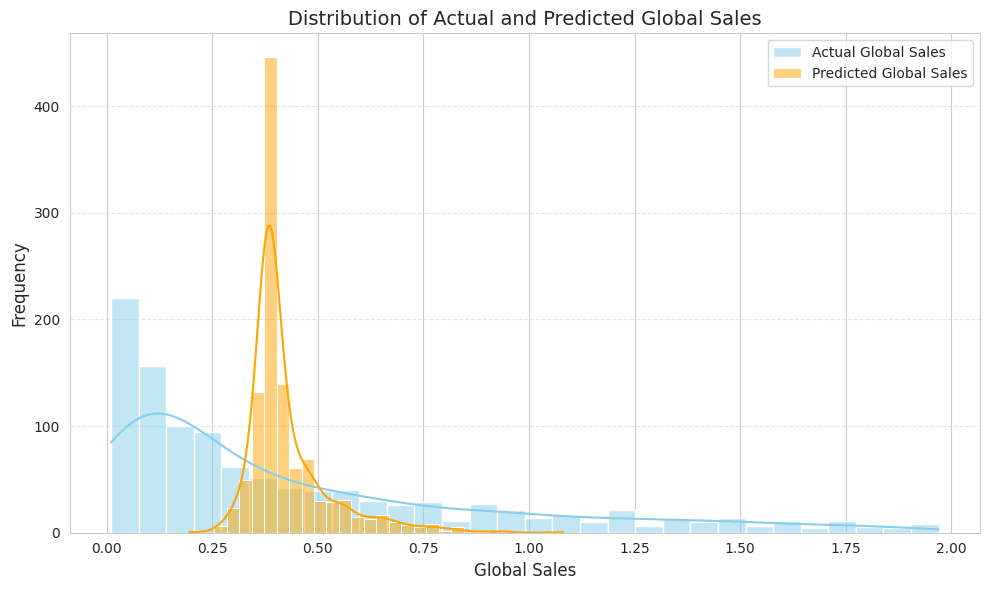

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of actual global sales
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='skyblue', label='Actual Global Sales', bins=30, kde=True)

# Plot the predicted global sales on the same plot
sns.histplot(y_pred, color='orange', label='Predicted Global Sales', bins=30, kde=True)

plt.xlabel('Global Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Actual and Predicted Global Sales', fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict on the testing set
y_pred = best_xgb_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.20486729108300897


In [ ]:
from sklearn.metrics import r2_score

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.04501635448856334


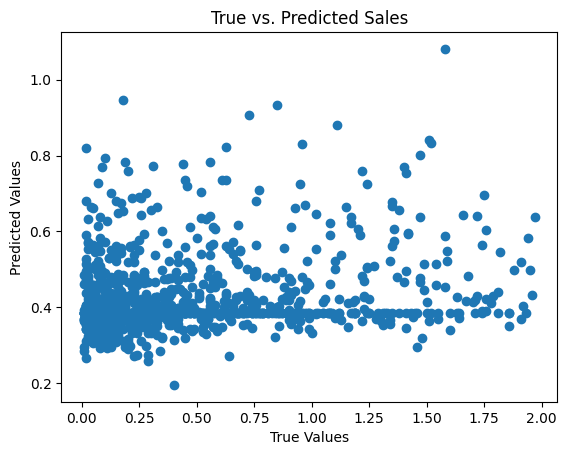

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Sales')
plt.show()

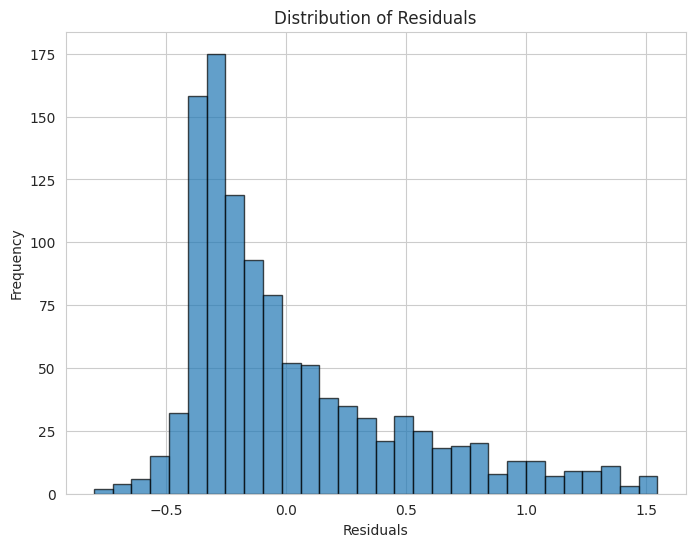

In [ ]:
residuals = y_test - y_pred.squeeze()

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

NameError: name 'top_features' is not defined

<Figure size 1200x800 with 0 Axes>

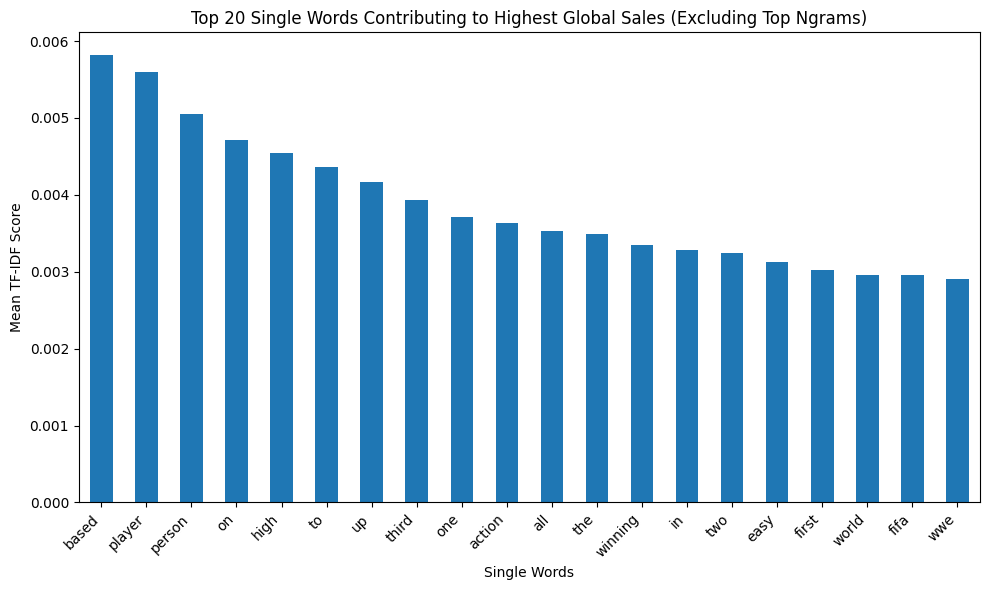

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace missing values with empty strings
cleaned_games_dataset['Preprocessed_Summary_More'].fillna('', inplace=True)

# Extract the text data
text_data = cleaned_games_dataset['Preprocessed_Summary_More'].tolist()

# Vectorize the text data using TF-IDF with unigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 1))
tfidf_matrix = vectorizer.fit_transform(text_data)

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add global sales data to the TF-IDF DataFrame
tfidf_df['Global_Sales'] = cleaned_games_dataset['Global_Sales']

# Calculate the mean TF-IDF score for each unigram
mean_tfidf_by_unigram = tfidf_df.drop(columns=['Global_Sales']).mean()

# Filter out unigrams that are part of the top ngrams list
significant_unigrams = mean_tfidf_by_unigram.drop(index=top_ngrams.index, errors='ignore')

# Sort unigrams by mean TF-IDF score
top_unigrams = significant_unigrams.sort_values(ascending=False).head(20)

# Plot the bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_unigrams.plot(kind='bar')
plt.title('Top 20 Single Words Contributing to Highest Global Sales (Excluding Top Ngrams)')
plt.xlabel('Single Words')
plt.ylabel('Mean TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace missing values with empty strings
cleaned_games_dataset['Preprocessed_Summary_More'].fillna('', inplace=True)

# Extract the text data
text_data = cleaned_games_dataset['Preprocessed_Summary_More'].tolist()

# Vectorize the text data using TF-IDF with bigrams and trigrams
vectorizer = TfidfVectorizer(ngram_range=(2, 3))
tfidf_matrix = vectorizer.fit_transform(text_data)

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add global sales data to the TF-IDF DataFrame
tfidf_df['Global_Sales'] = cleaned_games_dataset['Global_Sales']

# Calculate the mean TF-IDF score for each bigram or trigram
mean_tfidf_by_phrase = tfidf_df.drop(columns=['Global_Sales']).mean()

# Sort phrases by mean TF-IDF score
top_phrases = mean_tfidf_by_phrase.sort_values(ascending=False).head(100)
pd.set_option('display.max_rows', None)
print("Top 100 bigrams and trigrams contributing to highest global sales:")
print(top_phrases)


FileNotFoundError: [Errno 2] No such file or directory: 'Updated_Cleaned_Games_Dataset_Preprocessed.csv'

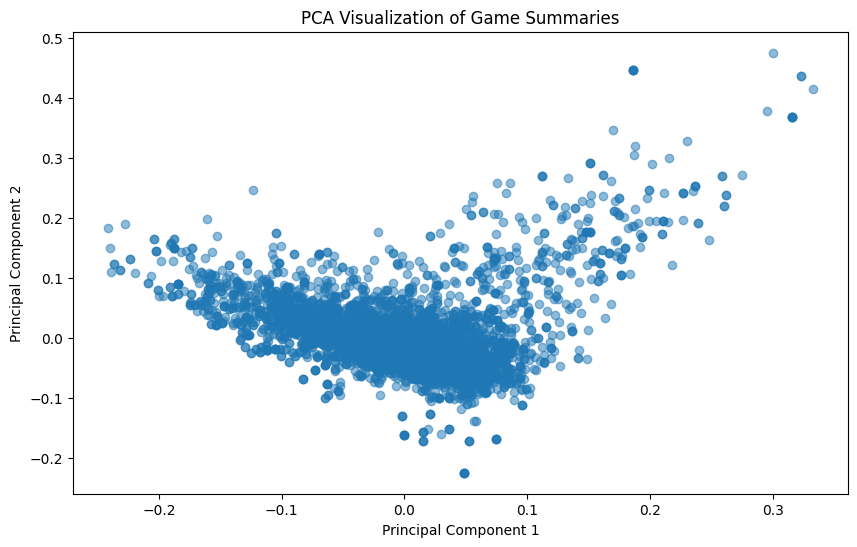

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Replace missing values with empty strings
cleaned_games_dataset['Preprocessed_Summary_More'].fillna('', inplace=True)

# Extract the text data
text_data = cleaned_games_dataset['Preprocessed_Summary_More'].tolist()

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features for visualization
tfidf_matrix = vectorizer.fit_transform(text_data)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Plot the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Visualization of Game Summaries Processed')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Preprocess the text
# these words are the most successful based on frequency and total sales

stop_words = set(stopwords.words("english"))
word_freq = defaultdict(int)
word_sales = defaultdict(float)

for summary, sales in zip(df["Summary"], df["Global_Sales"]):
    # Check if summary and sales are not missing
    if pd.notna(summary) and pd.notna(sales):
        # Normalize and tokenize the summary, remove stopwords
        words = [word.lower() for word in word_tokenize(str(summary)) if word.isalpha() and word.lower() not in stop_words]

        # Count word frequencies and total sales associated with each word
        for word in words:
            word_freq[word] += 1
            word_sales[word] += sales

# Sort words based on frequency and total sales
sorted_words = sorted(word_freq.items(), key=lambda x: (x[1], word_sales[x[0]]), reverse=True)

# Filter and present results
top_words = [(word, freq, word_sales[word]) for word, freq in sorted_words if freq > 100]  # Adjust threshold as needed

#for word, freq, sales in top_words[:100]:  # Display top 20 words
 #   print(f"Word: {word}, Frequency: {freq}, Total Sales: {sales}")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the game descriptions to obtain TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(df['Summary'].astype(str))

# Get feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a dictionary to store TF-IDF scores for each word
word_tfidf_scores = dict(zip(feature_names, tfidf_vectorizer.idf_))

# Sort words based on TF-IDF scores
sorted_words_tfidf = sorted(word_tfidf_scores.items(), key=lambda x: x[1], reverse=True)

# Filter and present results
top_words_tfidf = [(word, word_freq[word], word_sales[word]) for word, _ in sorted_words_tfidf if word in word_freq]

#for word, freq, sales in top_words_tfidf[:200]:  # Display top 20 words
 #   print(f"Word: {word}, Frequency: {freq}, Total Sales: {sales}")


In [ ]:
# Combine metrics to calculate a score for each word
word_scores_combined = {word: word_freq[word] * word_sales[word] for word in word_freq}

# Sort words based on the combined score
sorted_words_combined = sorted(word_scores_combined.items(), key=lambda x: x[1], reverse=True)

# Filter and present results
top_words_combined = [(word, word_freq[word], word_sales[word], score) for word, score in sorted_words_combined if word in word_freq]

for word, freq, sales, score in top_words_combined[:100]:  # Display top 20 words
    print(f"Word: {word}, Frequency: {freq}, Total Sales: {sales}, Combined Score: {score}")

Word: new, Frequency: 2423, Total Sales: 4816.830000000018, Combined Score: 11671179.090000045
Word: players, Frequency: 2217, Total Sales: 4677.140000000041, Combined Score: 10369219.380000092
Word: game, Frequency: 2634, Total Sales: 3703.640000000047, Combined Score: 9755387.760000125
Word: world, Frequency: 1902, Total Sales: 2254.6900000000383, Combined Score: 4288420.3800000725
Word: play, Frequency: 1366, Total Sales: 1722.7999999999902, Combined Score: 2353344.799999987
Word: experience, Frequency: 1296, Total Sales: 1474.1899999999982, Combined Score: 1910550.2399999977
Word: take, Frequency: 1205, Total Sales: 1211.0299999999913, Combined Score: 1459291.1499999897
Word: features, Frequency: 1200, Total Sales: 1167.6499999999921, Combined Score: 1401179.9999999905
Word: including, Frequency: 1132, Total Sales: 1083.4199999999914, Combined Score: 1226431.4399999904
Word: characters, Frequency: 975, Total Sales: 1186.9799999999907, Combined Score: 1157305.499999991
Word: time, F

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Handle outliers in 'Global_Sales' using winsorization or other methods
# For example, replace values above the 99th percentile with the value at the 99th percentile
percentile_99 = np.percentile(df['Global_Sales'], 99)
df.loc[df['Global_Sales'] > percentile_99, 'Global_Sales'] = percentile_99

# Additional feature engineering if needed (e.g., extracting features from release date)

Mean Squared Error: 117.95474982974247


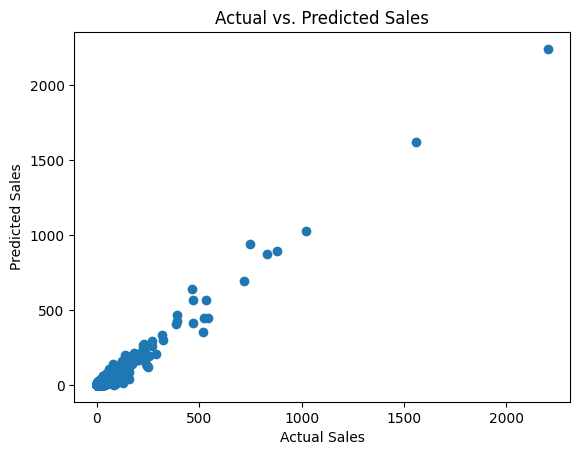

Random Forest Mean Squared Error: 166.69289596996452


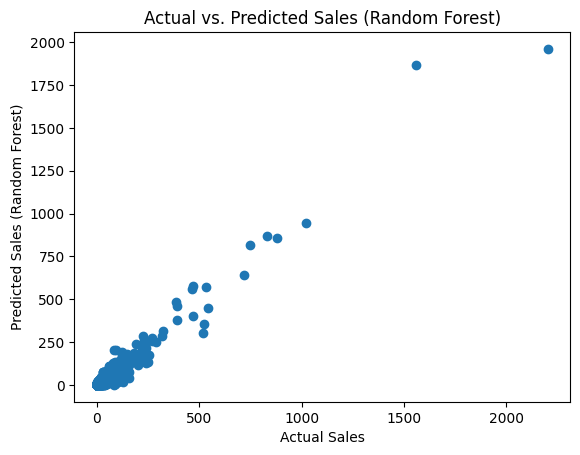

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the sales on the testing set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = metrics.mean_squared_error(y_test, rf_y_pred)
print("Random Forest Mean Squared Error:", rf_mse)

# Visualize the predicted vs. actual sales for Random Forest model
plt.scatter(y_test, rf_y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales (Random Forest)")
plt.title("Actual vs. Predicted Sales (Random Forest)")
plt.show()

Gradient Boosting Mean Squared Error: 157.23604535282556


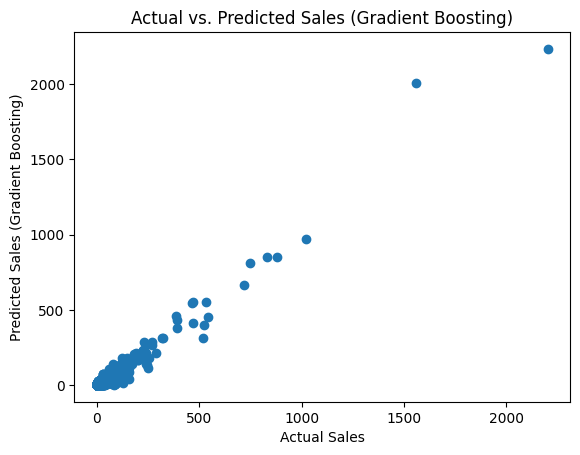

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict the sales on the testing set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
gb_mse = metrics.mean_squared_error(y_test, gb_y_pred)
print("Gradient Boosting Mean Squared Error:", gb_mse)

# Visualize the predicted vs. actual sales for Gradient Boosting model
plt.scatter(y_test, gb_y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales (Gradient Boosting)")
plt.title("Actual vs. Predicted Sales (Gradient Boosting)")
plt.show()